
image 1/1 /home/kiwi/github_package/turtlebot-autonomy/subtask/detect_signs/test_img/right1.png: 480x640 1 right, 198.8ms
Speed: 16.2ms preprocess, 198.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Box 0: x=146.1, y=81.4, w=30.0, h=30.9, area=927.3, conf=0.978, class=1.0


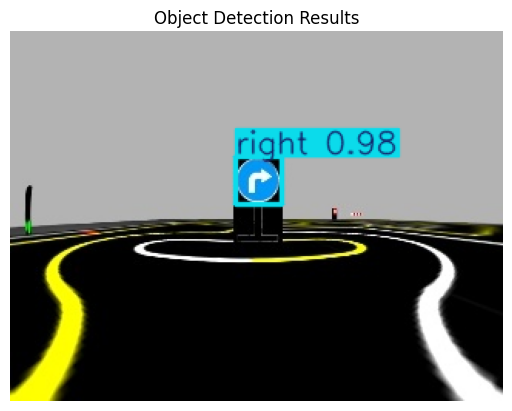

In [2]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np

# 모델 로드
model = YOLO("/home/kiwi/github_package/turtlebot-autonomy/subtask/detect_sign_modify.pt")

# 예측 실행 (저장 없이)
results = model.predict(
    source="/home/kiwi/github_package/turtlebot-autonomy/subtask/detect_signs/test_img/right1.png",
    save=False,  
    conf=0.2
)

result_img = results[0].plot()

plt.imshow(result_img[..., ::-1])
plt.axis("off")  
plt.title("Object Detection Results") 

# 결과에서 첫 번째 이미지 결과 가져오기
result = results[0]

boxes = result.boxes.xyxy.cpu().numpy()
confidences = result.boxes.conf.cpu().numpy()
class_ids = result.boxes.cls.cpu().numpy()

for i, box in enumerate(boxes):
    x1, y1, x2, y2 = box
    width = x2 - x1
    height = y2 - y1
    area = width * height
    print(f"Box {i}: x={x1:.1f}, y={y1:.1f}, w={width:.1f}, h={height:.1f}, area={area:.1f}, conf={confidences[i]:.3f}, class={class_ids[i]}")


In [ ]:
from ultralytics import YOLO

# 모델 로드
model = YOLO("/home/kiwi/github_package/turtlebot-autonomy/traffic_sign_detect.pt")

# 예측 실행
results = model.predict(
    source="/home/kiwi/github_package/turtlebot-autonomy/subtask/detect_signs/test_img/stop1.png",
    save=True,     
    save_txt=False,  
    conf=0.25
)       